In [ ]:
!pip install captum

In [ ]:
!unzip time-series-attribution-master.zip

In [ ]:
!rm -rf /content/time-series-attribution/results/plots

### show one plot

cpu


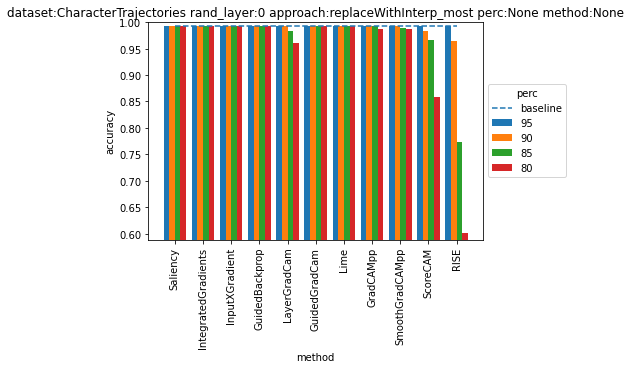

In [ ]:
%cd /content/time-series-attribution/src/notebooks

%run ../scripts/main.py  --visEvalParams '{"datasets":["CharacterTrajectories"], \
                                            "rand_layer":"0", \
                                            "approach":"replaceWithInterp_most", \
                                            "perc":None,  \
                                            "method":None, \
                                            }'  \

### save all plots

In [ ]:
%cd /content/time-series-attribution/src/notebooks

import itertools
from tqdm.auto import tqdm

params = ["rand_layer", "method", "approach", "perc"]
all_params = {"method":["Saliency", "IntegratedGradients", "InputXGradient", "GuidedBackprop", "LayerGradCam", "GuidedGradCam", "Lime", "GradCAMpp", "SmoothGradCAMpp", "ScoreCAM", "RISE"],
              "approach":["replaceWithZero_most", "replaceWithMean_most", "replaceWithInterp_most"],
              "rand_layer":[0,-1,-2,-3],
              "perc":[95,90,85,80]
              }

for param1 in tqdm(params, desc="param1", leave=False):
  for param2 in tqdm(params, desc="param2", leave=False):
    if param1 != param2:
      visEvalParams = {"dataset":None, param1:None, param2:None}  # set 2 params to None

      new_params = list(params)
      new_params.remove(param1); new_params.remove(param2)
      new_params1 = [all_params[param] for param in new_params]
      # generate a list of all param combinations
      allParamCombs = list(itertools.product(*new_params1))

      for paramComb in tqdm(allParamCombs, desc="paramComb", leave=False):
        visEvalParams1 = dict(visEvalParams)
        for paramName, param3 in zip(new_params, paramComb):
          visEvalParams1[paramName] = param3
        visEvalParams1 = '"' + str(visEvalParams1) + '"'

        %run ../scripts/main.py  --visEvalParams $visEvalParams1  \
                                 --save True
        %cd /content/time-series-attribution/src/notebooks                          
           

In [ ]:
!zip -r /content/plts.zip /content/time-series-attribution/results/plots

In [ ]:
# to merge results of different datasets to one dict

import os
import json
os.chdir("/content/results")

mydict = {}
for file in os.listdir():
  fname = file[:file.index('_')]
  with open(file) as json_file:
    data = json.load(json_file)
  mydict[fname] = data
  
with open("mydict.json","w") as f:
  json.dump(mydict,f)